In [8]:
# importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
from scipy.stats import ttest_ind
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import warnings
warnings.filterwarnings("ignore")

In [9]:
ds=pd.read_excel(r"C:\Users\hp\LearnBayAIML\PythonCodes\Projects\Credit_Risk\train.xlsx")
ds1=pd.read_excel(r"C:\Users\hp\LearnBayAIML\PythonCodes\Projects\Credit_Risk\train.xlsx")


In [28]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Column1                               150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [29]:
ds1.head(10)

Column1  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0        1                 1                              0.766127   45   
1        2                 0                              0.957151   40   
2        3                 0                              0.658180   38   
3        4                 0                              0.233810   30   
4        5                 0                              0.907239   49   
5        6                 0                              0.213179   74   
6        7                 0                              0.305682   57   
7        8                 0                              0.754464   39   
8        9                 0                              0.116951   27   
9       10                 0                              0.189169   57   

   NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
0                                     2     0.802982         9120.0   
1                                     0     0.121876         2600.0   
2                                     1     0.085113         3042.0   
3                                     0     0.036050         3300.0   
4                                     1     0.024926        63588.0   
5                                     0     0.375607         3500.0   
6                                     0  5710.000000            NaN   
7                                     0     0.209940         3500.0   
8                                     0    46.000000            NaN   
9                                     0     0.606291        23684.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   
5                                3                        0   
6                                8                        0   
7                                8                        0   
8                                2                        0   
9                                9                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   
5                             1                                     0   
6                             3                                     0   
7                             0                                     0   
8                             0                                     0   
9                             4                                     0   

   NumberOfDependents  
0                 2.0  
1                 1.0  
2                 0.0  
3                 0.0  
4                 0.0  
5                 1.0  
6                 0.0  
7                 0.0  
8                 NaN  
9                 2.0

# EDA

In [10]:
# Missing Values

ds1.isna().sum()

Column1                                     0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [10]:
# Monthly Income has 29731 missing values and NumberOfDependents has 3924 missing values. Both are necessary fields therefore needs imputation.

In [11]:
# Get numerical features
features_num=[f for f in ds.columns if ds1[f].dtypes != 'O']

In [32]:
len(features_num)
# All features are numerical in train.csv

12

In [12]:
# Checking relationship between Age and other features

cpds1=ds1.copy()

cpds1.drop('Column1',axis=1,inplace=True)

cpds1['age']

bins = [0, 20, 39, 59,80,120]
labels=['Young','Above 20','Midage','Senior','Very Senior']
cpds1['age_bucket'] = pd.cut(cpds1['age'], bins=bins, labels=labels)
cpds1[['age','age_bucket']]

age age_bucket
0        45     Midage
1        40     Midage
2        38   Above 20
3        30   Above 20
4        49     Midage
...     ...        ...
149995   74     Senior
149996   44     Midage
149997   58     Midage
149998   30   Above 20
149999   64     Senior

[150000 rows x 2 columns]

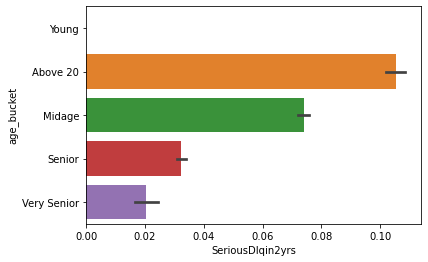

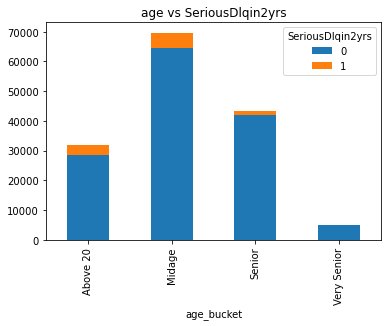

In [13]:
# Age versus SeriousDlqin2yrs

sns.barplot(x = "SeriousDlqin2yrs",
              y = "age_bucket",data=cpds1)
# sns.stripplot(x = "SeriousDlqin2yrs",
#               y = "age",
#               color = 'black',
#               alpha=0.3,
#               data = cds)

pd.crosstab(cpds1['age_bucket'],cpds1['SeriousDlqin2yrs']).plot.bar(stacked=True)

plt.title("age vs SeriousDlqin2yrs")
plt.show()



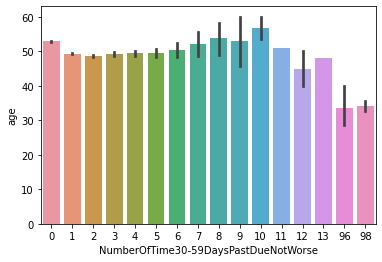

<AxesSubplot:xlabel='NumberOfTime30-59DaysPastDueNotWorse', ylabel='age_bucket'>

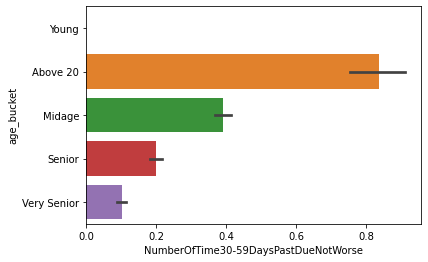

In [35]:
# Age versus NumberOfTime30-59DaysPastDueNotWorse

sns.barplot(x = "NumberOfTime30-59DaysPastDueNotWorse",y = "age",data=cpds1)

plt.show()

sns.barplot(x = "NumberOfTime30-59DaysPastDueNotWorse",y = "age_bucket",data=cpds1)


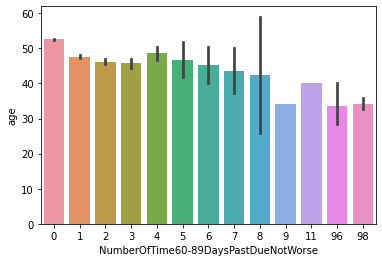

<AxesSubplot:xlabel='NumberOfTime60-89DaysPastDueNotWorse', ylabel='age_bucket'>

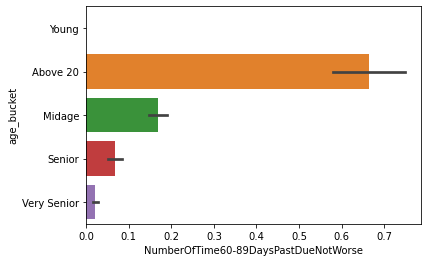

In [36]:
# Age versus NumberOfTime60-89DaysPastDueNotWorse

sns.barplot(x = "NumberOfTime60-89DaysPastDueNotWorse",y = "age",data=cpds1)

plt.show()

sns.barplot(x = "NumberOfTime60-89DaysPastDueNotWorse",y = "age_bucket",data=cpds1)


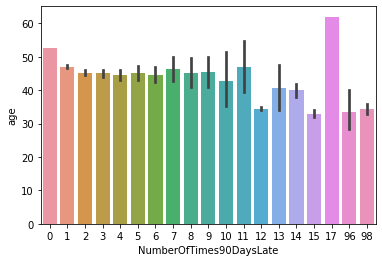

<AxesSubplot:xlabel='NumberOfTimes90DaysLate', ylabel='age_bucket'>

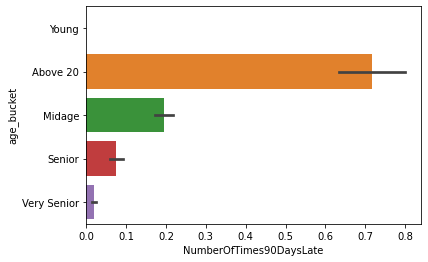

In [37]:
# Age versus NumberOfTimes90DaysLate

sns.barplot(x = "NumberOfTimes90DaysLate",y = "age",data=cpds1)

plt.show()

sns.barplot(x = "NumberOfTimes90DaysLate",y = "age_bucket",data=cpds1)

In [ ]:
# The above data shows that people in the age bracket of 20-40 are mostly late to pay their loans on time

In [14]:
# Checking relationship between Monthly Income and other features

# Since Monthly Income has NAN values lets first impute those values

# Checking how skewed data is

mean_income=cpds1['MonthlyIncome'].mean()
median_income=cpds1['MonthlyIncome'].median()
print(mean_income,median_income)

# The difference in median and mean is not very small and therefore suggests that the data is skewed and has outliers

6670.221237392844 5400.0


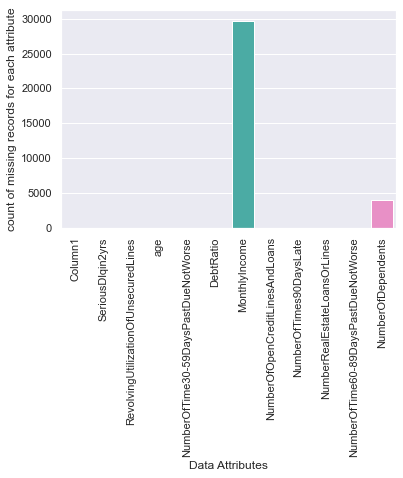

In [15]:
# Lets plot columns with Nan Values

x=ds1.columns
y=ds1.isna().sum()

sns.set()
sns.barplot(x,y)
ax = plt.gca()
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(8,8)})
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

In [16]:
# Dropping category with age = 0

cpds1.drop(cpds1[cpds1['age'] == 0].index, inplace = True)


In [17]:
med_mi=cpds1.groupby(['age_bucket']).agg({'MonthlyIncome':'median'})
med_mi.loc[2,'MonthlyIncome']
med_mi

MonthlyIncome
age_bucket                
Young                  NaN
Above 20            4000.0
Midage              6150.0
Senior              5458.0
Very Senior         4166.0

In [18]:
cpds1.loc[(cpds1['age_bucket'] == 'Young'), 'MonthlyIncome']=cpds1.loc[(cpds1['age_bucket'] == 'Young'), 'MonthlyIncome'].fillna(0)
cpds1.loc[(cpds1['age_bucket'] == 'Above 20'), 'MonthlyIncome']=cpds1.loc[(cpds1['age_bucket'] == 'Above 20'), 'MonthlyIncome'].fillna(med_mi.loc[1,'MonthlyIncome'])
cpds1.loc[(cpds1['age_bucket'] == 'Midage'), 'MonthlyIncome']=cpds1.loc[(cpds1['age_bucket'] == 'Midage'), 'MonthlyIncome'].fillna(med_mi.loc[2,'MonthlyIncome'])
cpds1.loc[(cpds1['age_bucket'] == 'Senior'), 'MonthlyIncome']=cpds1.loc[(cpds1['age_bucket'] == 'Senior'), 'MonthlyIncome'].fillna(med_mi.loc[3,'MonthlyIncome'])
cpds1.loc[(cpds1['age_bucket'] == 'Very Senior'), 'MonthlyIncome']=cpds1.loc[(cpds1['age_bucket'] == 'Very Senior'), 'MonthlyIncome'].fillna(med_mi.loc[4,'MonthlyIncome'])

cpds1.isna().sum()

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      3924
age_bucket                                 0
dtype: int64

<AxesSubplot:xlabel='MonthlyIncome', ylabel='NumberOfTime30-59DaysPastDueNotWorse'>

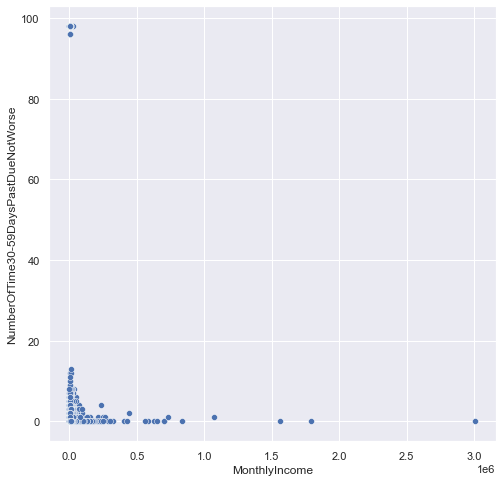

In [19]:
# MonthlyIncome versus NumberOfTime30-59DaysPastDueNotWorse 

sns.scatterplot(x='MonthlyIncome', y = "NumberOfTime30-59DaysPastDueNotWorse",data=cpds1)


<AxesSubplot:xlabel='NumberOfDependents', ylabel='age'>

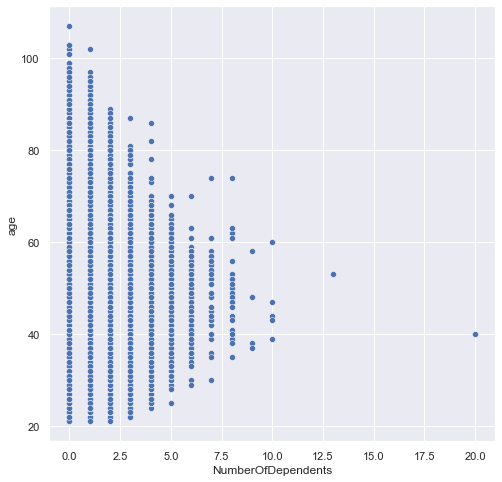

In [44]:
# Imputing values for number of dependencies

cpds1['NumberOfDependents'].describe()

sns.scatterplot(x='NumberOfDependents', y = "age",data=cpds1)


In [ ]:
# The above graph shows that the age bracket between 20-50 has maximum number of dependents

In [20]:
cpds1['NumberOfDependents'].value_counts()

# The highest count is 0 dependents

0.0     86902
1.0     26316
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

In [21]:
# Filling Nan values with 0
cpds1['NumberOfDependents']=cpds1['NumberOfDependents'].fillna(0)

In [22]:
# Checking for Nan Values
cpds1.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
age_bucket                              0
dtype: int64

# FEATURE ENGINEERING AND SELECTION

In [23]:
# Checking for features with zero variance

novariance_features=cpds1.loc[:,cpds1.apply(pd.Series.nunique) == 1]
novariance_features

# Since there are no zero variance features we cant drop any features on that accord

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[149999 rows x 0 columns]

In [24]:
# Correlation

cm=cpds1.corr()
cm

SeriousDlqin2yrs  \
SeriousDlqin2yrs                              1.000000   
RevolvingUtilizationOfUnsecuredLines         -0.001802   
age                                          -0.115397   
NumberOfTime30-59DaysPastDueNotWorse          0.125587   
DebtRatio                                    -0.007602   
MonthlyIncome                                -0.017711   
NumberOfOpenCreditLinesAndLoans              -0.029669   
NumberOfTimes90DaysLate                       0.117175   
NumberRealEstateLoansOrLines                 -0.007037   
NumberOfTime60-89DaysPastDueNotWorse          0.102261   
NumberOfDependents                            0.046871   

                                      RevolvingUtilizationOfUnsecuredLines  \
SeriousDlqin2yrs                                                 -0.001802   
RevolvingUtilizationOfUnsecuredLines                              1.000000   
age                                                              -0.005899   
NumberOfTime30-59DaysPastDueNotWorse                             -0.001313   
DebtRatio                                                         0.003961   
MonthlyIncome                                                     0.006430   
NumberOfOpenCreditLinesAndLoans                                  -0.011281   
NumberOfTimes90DaysLate                                          -0.001061   
NumberRealEstateLoansOrLines                                      0.006235   
NumberOfTime60-89DaysPastDueNotWorse                             -0.001048   
NumberOfDependents                                                0.001193   

                                           age  \
SeriousDlqin2yrs                     -0.115397   
RevolvingUtilizationOfUnsecuredLines -0.005899   
age                                   1.000000   
NumberOfTime30-59DaysPastDueNotWorse -0.062995   
DebtRatio                             0.024185   
MonthlyIncome                         0.029193   
NumberOfOpenCreditLinesAndLoans       0.147700   
NumberOfTimes90DaysLate              -0.061009   
NumberRealEstateLoansOrLines          0.033172   
NumberOfTime60-89DaysPastDueNotWorse -0.057163   
NumberOfDependents                   -0.215677   

                                      NumberOfTime30-59DaysPastDueNotWorse  \
SeriousDlqin2yrs                                                  0.125587   
RevolvingUtilizationOfUnsecuredLines                             -0.001313   
age                                                              -0.062995   
NumberOfTime30-59DaysPastDueNotWorse                              1.000000   
DebtRatio                                                        -0.006542   
MonthlyIncome                                                    -0.009626   
NumberOfOpenCreditLinesAndLoans                                  -0.055312   
NumberOfTimes90DaysLate                                           0.983603   
NumberRealEstateLoansOrLines                                     -0.030565   
NumberOfTime60-89DaysPastDueNotWorse                              0.987006   
NumberOfDependents                                               -0.004591   

                                      DebtRatio  MonthlyIncome  \
SeriousDlqin2yrs                      -0.007602      -0.017711   
RevolvingUtilizationOfUnsecuredLines   0.003961       0.006430   
age                                    0.024185       0.029193   
NumberOfTime30-59DaysPastDueNotWorse  -0.006542      -0.009626   
DebtRatio                              1.000000      -0.015126   
MonthlyIncome                         -0.015126       1.000000   
NumberOfOpenCreditLinesAndLoans        0.049565       0.088949   
NumberOfTimes90DaysLate               -0.008320      -0.011855   
NumberRealEstateLoansOrLines           0.120047       0.118641   
NumberOfTime60-89DaysPastDueNotWorse  -0.007533      -0.010596   
NumberOfDependents                    -0.044475       0.066995   

                                      NumberOfOpenCreditLinesAndLoans  \


In [50]:
# # Function to find highly correlated features:

def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

#Getting features which 80% correlated

correlation(cpds1,0.8)

# NumberOfTime60-89DaysPastDueNotWorse and NumberOfTimes90DaysLate are highly correlated

{'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'}

<AxesSubplot:>

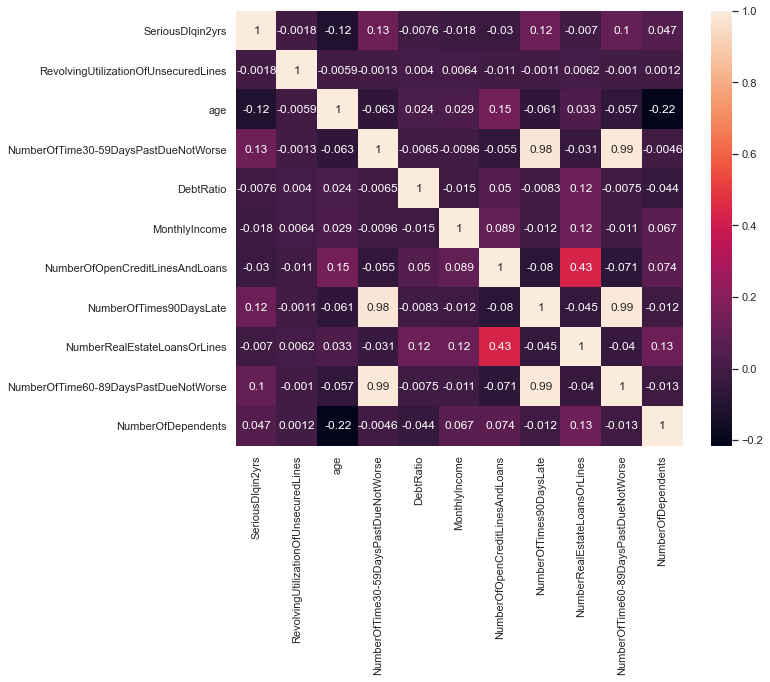

In [51]:
# Checking correlation with HeatMap

plt.figure(figsize = (10,8))
sns.heatmap(cm, annot=True)

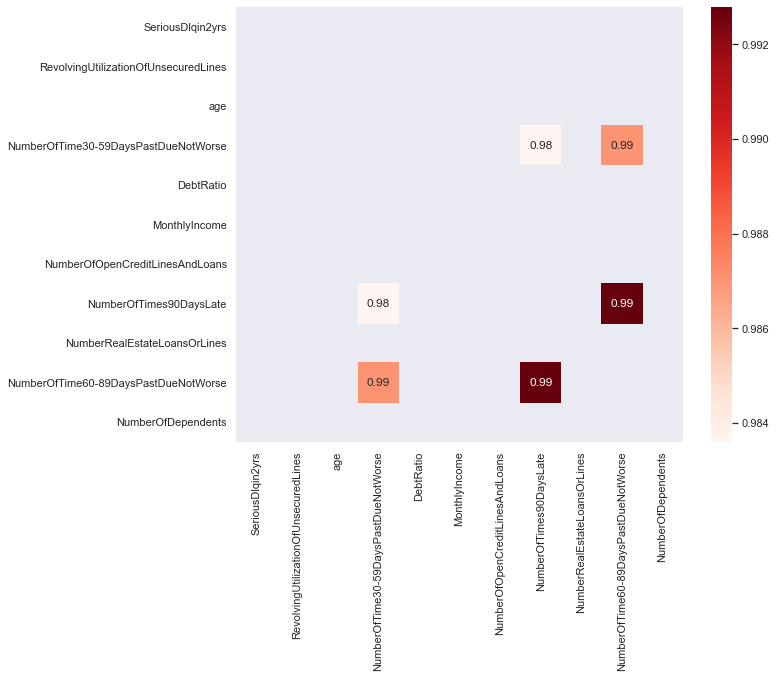

SeriousDlqin2yrs  \
SeriousDlqin2yrs                                   NaN   
RevolvingUtilizationOfUnsecuredLines               NaN   
age                                                NaN   
NumberOfTime30-59DaysPastDueNotWorse               NaN   
DebtRatio                                          NaN   
MonthlyIncome                                      NaN   
NumberOfOpenCreditLinesAndLoans                    NaN   
NumberOfTimes90DaysLate                            NaN   
NumberRealEstateLoansOrLines                       NaN   
NumberOfTime60-89DaysPastDueNotWorse               NaN   
NumberOfDependents                                 NaN   

                                      RevolvingUtilizationOfUnsecuredLines  \
SeriousDlqin2yrs                                                       NaN   
RevolvingUtilizationOfUnsecuredLines                                   NaN   
age                                                                    NaN   
NumberOfTime30-59DaysPastDueNotWorse                                   NaN   
DebtRatio                                                              NaN   
MonthlyIncome                                                          NaN   
NumberOfOpenCreditLinesAndLoans                                        NaN   
NumberOfTimes90DaysLate                                                NaN   
NumberRealEstateLoansOrLines                                           NaN   
NumberOfTime60-89DaysPastDueNotWorse                                   NaN   
NumberOfDependents                                                     NaN   

                                      age  \
SeriousDlqin2yrs                      NaN   
RevolvingUtilizationOfUnsecuredLines  NaN   
age                                   NaN   
NumberOfTime30-59DaysPastDueNotWorse  NaN   
DebtRatio                             NaN   
MonthlyIncome                         NaN   
NumberOfOpenCreditLinesAndLoans       NaN   
NumberOfTimes90DaysLate               NaN   
NumberRealEstateLoansOrLines          NaN   
NumberOfTime60-89DaysPastDueNotWorse  NaN   
NumberOfDependents                    NaN   

                                      NumberOfTime30-59DaysPastDueNotWorse  \
SeriousDlqin2yrs                                                       NaN   
RevolvingUtilizationOfUnsecuredLines                                   NaN   
age                                                                    NaN   
NumberOfTime30-59DaysPastDueNotWorse                                   NaN   
DebtRatio                                                              NaN   
MonthlyIncome                                                          NaN   
NumberOfOpenCreditLinesAndLoans                                        NaN   
NumberOfTimes90DaysLate                                           0.983603   
NumberRealEstateLoansOrLines                                           NaN   
NumberOfTime60-89DaysPastDueNotWorse                              0.987006   
NumberOfDependents                                                     NaN   

                                      DebtRatio  MonthlyIncome  \
SeriousDlqin2yrs                            NaN            NaN   
RevolvingUtilizationOfUnsecuredLines        NaN            NaN   
age                                         NaN            NaN   
NumberOfTime30-59DaysPastDueNotWorse        NaN            NaN   
DebtRatio                                   NaN            NaN   
MonthlyIncome                               NaN            NaN   
NumberOfOpenCreditLinesAndLoans             NaN            NaN   
NumberOfTimes90DaysLate                     NaN            NaN   
NumberRealEstateLoansOrLines                NaN            NaN   
NumberOfTime60-89DaysPastDueNotWorse        NaN            NaN   
NumberOfDependents                          NaN            NaN   

                                      NumberOfOpenCreditLinesAndLoans  \
SeriousDlqin2yrs                                            

In [52]:
# Filter highly correlated features and plot
filtr_cr = cm[((cm >= .80) | (cm <= -.80)) & (cm !=1.000)]
plt.figure(figsize=(10,8))
sns.heatmap(filtr_cr, annot=True, cmap="Reds")
plt.show()
filtr_cr

In [25]:
# Dropping NumberOfTimes90DaysLate due to high correlation

cpds1.drop('NumberOfTimes90DaysLate',axis=1,inplace=True)

In [26]:
# Splitting into train and test sets

ncds1=cpds1.copy()
# xdf=ncds.drop(['SeriousDlqin2yrs','Column1','NumberOfTimes90DaysLate'],axis=1,inplace=True)
X=ncds1.drop(['age_bucket','SeriousDlqin2yrs'],axis=1,inplace=True)
ydf=cpds1['SeriousDlqin2yrs']
ydf=ydf.loc[1:2000]
# x=ncds
X=ncds1.copy()
X=X.loc[1:2000,:]
X.shape

features_label = X.columns
X.isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [27]:
# Random Forest to select features

# Initializing the model
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X, ydf)
importances = classifier.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) RevolvingUtilizationOfUnsecuredLines 0.250961
 2) age                            0.152286
 3) NumberOfTime30-59DaysPastDueNotWorse 0.131814
 4) DebtRatio                      0.129440
 5) MonthlyIncome                  0.101780
 6) NumberOfOpenCreditLinesAndLoans 0.083687
 7) NumberRealEstateLoansOrLines   0.058265
 8) NumberOfTime60-89DaysPastDueNotWorse 0.050318
 9) NumberOfDependents             0.041448


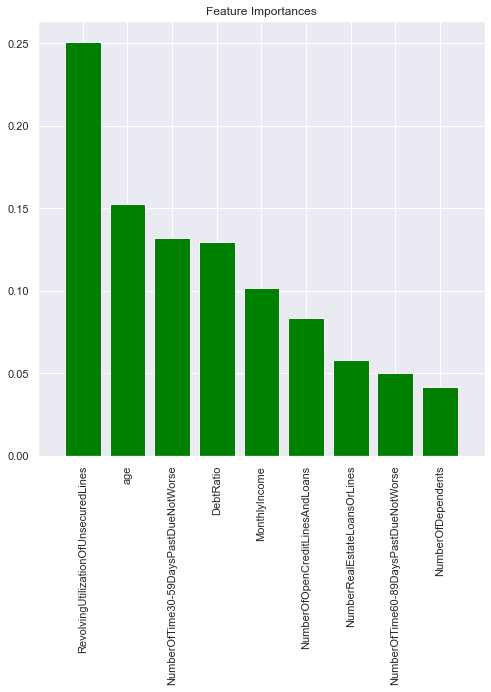

In [28]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Model Building

The algorithms that we are going to choose are as follows (this selection is based on intuition):

RandomForest

Logistic Regression

K-Nearest Neighbor (KNN)

AdaBoost

GradientBoosting

In [29]:
# Splitting dataset into training and testing dataset

X_train,X_test,Y_train,Y_test=train_test_split(X,ydf,test_size =0.2)


# Scaling data for better accuracy with respect to models
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

# Random Forest

# Initializing the model

RF = RandomForestClassifier(criterion='gini', max_depth=None, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=True, 
                               random_state=42, verbose=0)
RF.fit(X_train, Y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [30]:
# Retrieve OOB Rate to understand the optimal number of decision trees needed

RF.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 100
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    RF.set_params(n_estimators=i)
    RF.fit(X_train, Y_train)

    oob_error = 1 - RF.oob_score_
    error_rate[i] = oob_error
    
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 100 to 1000 trees)')

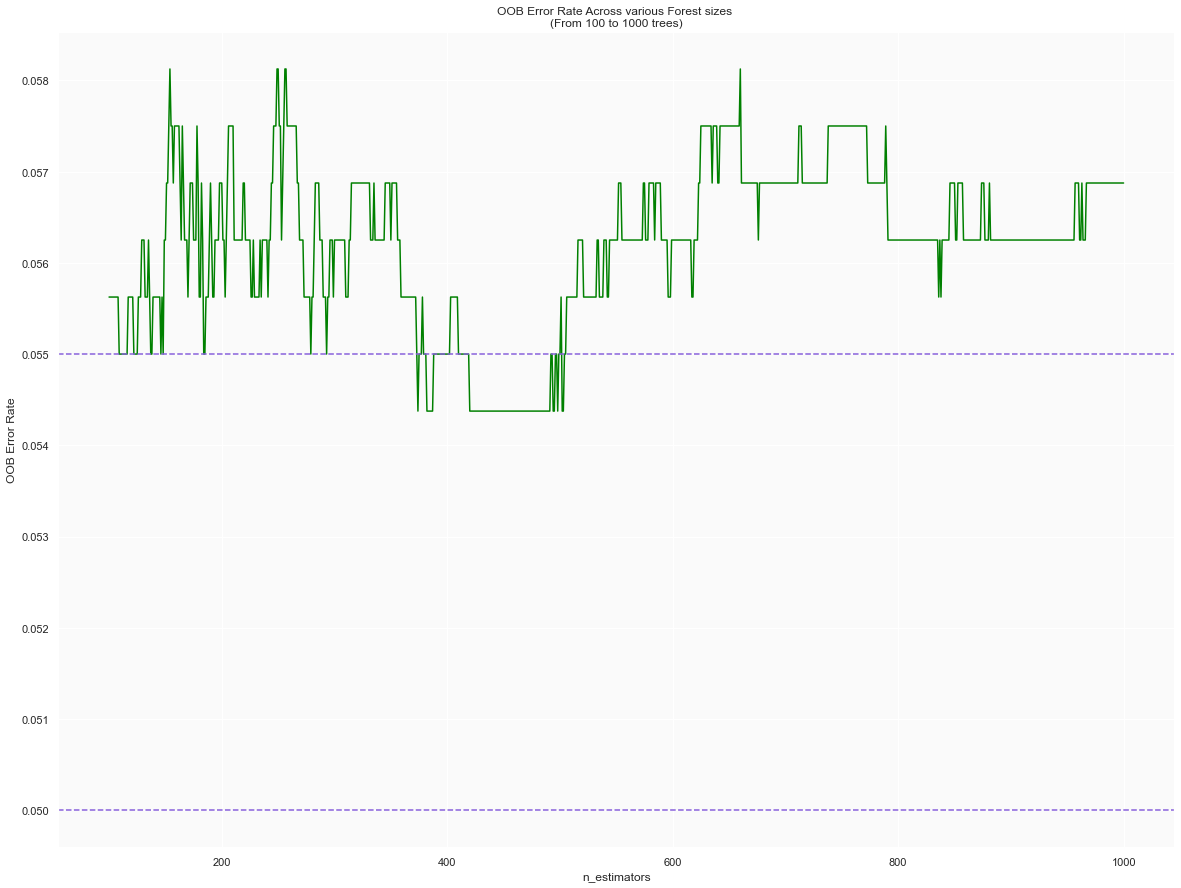

In [61]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'green')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 100 to 1000 trees)')

In [ ]:
# From this we understand best 500 trees are the best number of estimators

In [31]:
# GridSearchCV getting optimal parameters

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

gscv_rf = GridSearchCV(RF, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

# Fitting the model to our data
gscv_rf.fit(X_train, Y_train)
print('Best Parameters using grid search: \n', gscv_rf.best_params_)


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}


In [32]:
# Refine the tree via OOB Output taking 500 trees
RF.set_params(n_estimators=500,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(n_estimators=500, random_state=42)

In [33]:
# Fitting the data
RF.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [34]:
# Performance and Accuracy Metrics for Random Forest with GridSearchCv

predictions_rf = RF.predict(X_test)

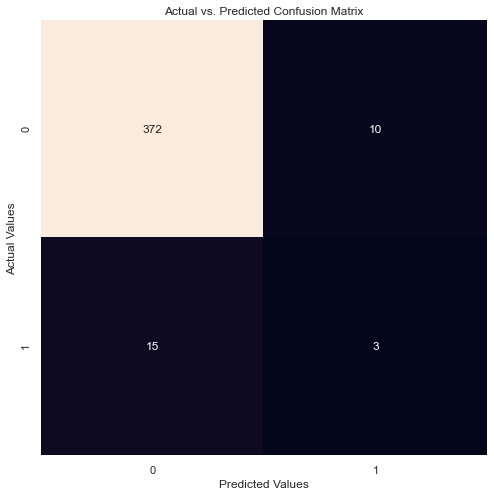

In [35]:
# Confusion Matrix for Random forest
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

# Plotting Confusion Matrix
conf_mat = create_conf_mat(Y_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [36]:
# Classification Report for Random Forest

clmrf = classification_report(Y_test, predictions_rf)
print(clmrf)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       382
           1       0.23      0.17      0.19        18

    accuracy                           0.94       400
   macro avg       0.60      0.57      0.58       400
weighted avg       0.93      0.94      0.93       400



AUC - Test Set: 80.47%


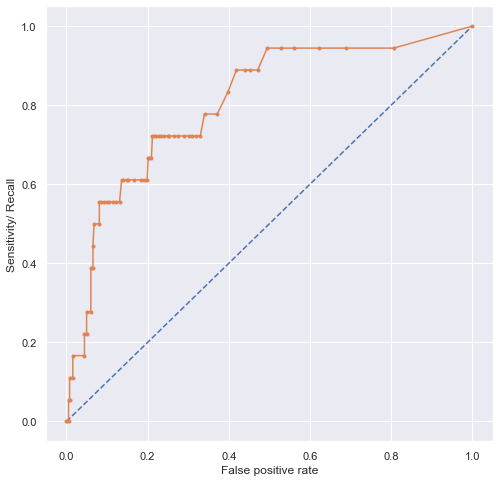

In [37]:
# AUC,ROC Curve for Random Forest

# predict probabilities
probs_RF = RF.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_RF = probs_RF[:, 1]

auc = roc_auc_score(Y_test, probs_RF)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs_RF)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

In [38]:
RF_test=RF.predict_proba(X_test)[:,1]
roc_auc_score(Y_test,RF_test , average='macro', sample_weight=None)

0.8046829552065154

In [39]:
# Logistic Regression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,Y_train)

LogisticRegression()

In [40]:
y_pred=logreg.predict(X_test)

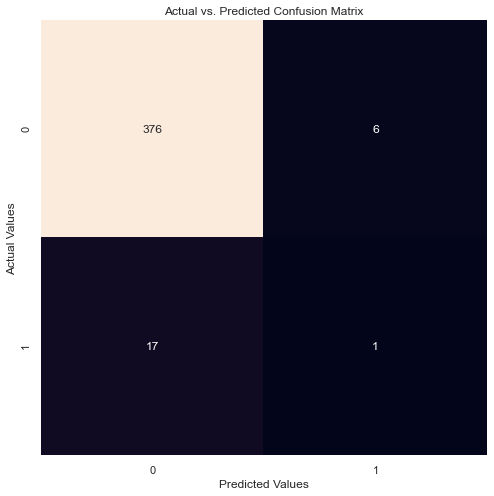

In [41]:
# Plotting Confusion Matrix
conf_mat = create_conf_mat(Y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [42]:
# Classification Report for Logistic Regression

clmlr = classification_report(Y_test, y_pred)
print(clmlr)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       382
           1       0.14      0.06      0.08        18

    accuracy                           0.94       400
   macro avg       0.55      0.52      0.53       400
weighted avg       0.92      0.94      0.93       400



AUC - Test Set: 75.26%


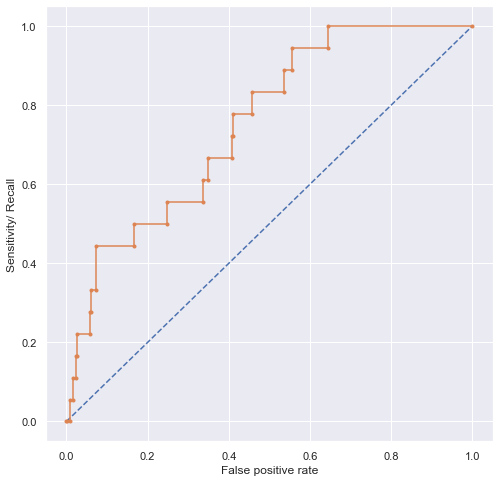

In [43]:
# AUC,ROC Curve for Logistic Regression

# predict probabilities
probs_LR = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_LR = probs_LR[:, 1]

auc = roc_auc_score(Y_test, probs_LR)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs_LR)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

In [44]:
LR_test=logreg.predict_proba(X_test)[:,1]
roc_auc_score(Y_test,LR_test , average='macro', sample_weight=None)

0.7526178010471205

In [ ]:
# KNN Classifier

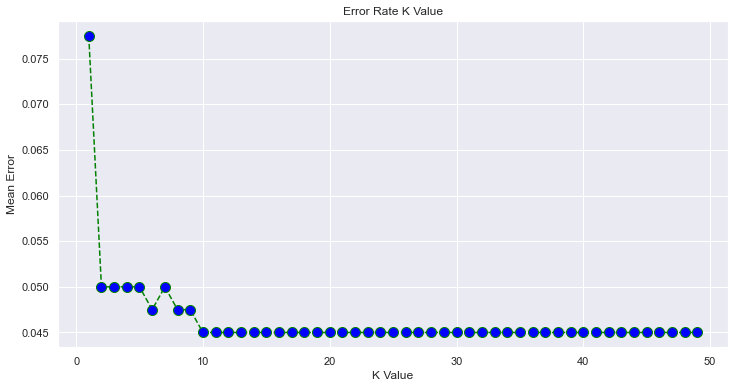

In [45]:
# Detection of Optimal Value for K Neighnours
err = []

# Calculating error for K values between 1 and 50
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    err.append(np.mean(pred_i != Y_test))

# Plotting the error for K values between 1 and 50

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), err, color='green', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

In [46]:
# Taking 11 as neighbour count since our curve is both low and stable at that point as seen above

classifier = KNeighborsClassifier(n_neighbors=11) 

# Fitting our data to the model
classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=11)

In [47]:
# Performance and metrics for K-Nearest Neighbour Classifier

Y_pred = classifier.predict(X_test)

# Confusion Matrix and Classification Report
print(confusion_matrix(Y_test, Y_pred))  
print(classification_report(Y_test, Y_pred))

[[382   0]
 [ 18   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       382
           1       0.00      0.00      0.00        18

    accuracy                           0.95       400
   macro avg       0.48      0.50      0.49       400
weighted avg       0.91      0.95      0.93       400



AUC - Test Set: 66.78%


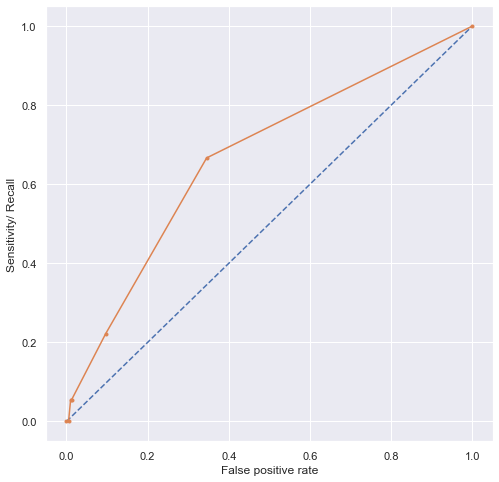

In [48]:
# AUC ROC Curve for K-Nearest Neighbour Classifier

# predict probabilities
probs_knn = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_knn = probs_knn[:, 1]

auc = roc_auc_score(Y_test, probs_knn)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs_knn)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

In [49]:
KNN_test=logreg.predict_proba(X_test)[:,1]
roc_auc_score(Y_test,KNN_test , average='macro', sample_weight=None)

0.7526178010471205

In [50]:
# AdaBoost

ADA = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=0.1)
ADA.fit(X_train, Y_train)

AdaBoostClassifier(learning_rate=0.1)

In [51]:
# Predicting the Test set results
y_pred = ADA.predict(X_test)

# Making the Confusion Matrix 
cm = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)
cm

array([[379,   3],
       [ 17,   1]], dtype=int64)

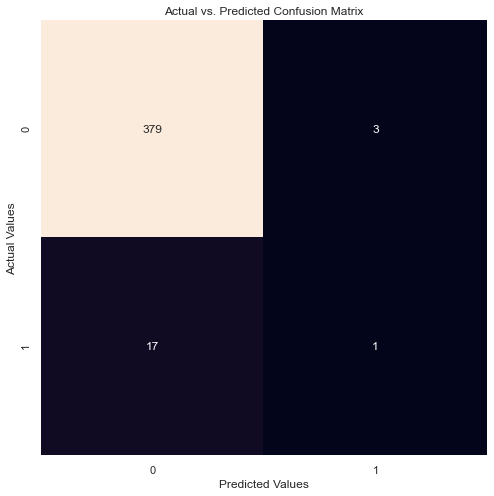

In [52]:
# Plotting Confusion Matrix
conf_mat = create_conf_mat(Y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [53]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       382
           1       0.25      0.06      0.09        18

    accuracy                           0.95       400
   macro avg       0.60      0.52      0.53       400
weighted avg       0.93      0.95      0.93       400



In [54]:
Ada_labels=ADA.predict_proba(X_test)[:,1]
roc_auc_score(Y_test,Ada_labels , average='macro', sample_weight=None)

0.793848167539267

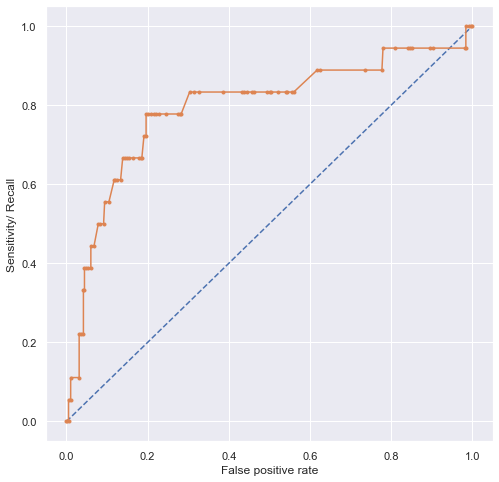

In [55]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, Ada_labels)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

In [56]:
# Gradient Boosting

GB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)
GB.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=200)

In [57]:
# Predicting the Test set results
y_pred = GB.predict(X_test)

# Making the Confusion Matrix 

cm = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)
cm

array([[368,  14],
       [ 15,   3]], dtype=int64)

In [58]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       382
           1       0.18      0.17      0.17        18

    accuracy                           0.93       400
   macro avg       0.57      0.57      0.57       400
weighted avg       0.93      0.93      0.93       400



In [59]:
GB_labels=GB.predict_proba(X_test)[:,1]
roc_auc_score(Y_test,GB_labels , average='macro', sample_weight=None)

0.7729784758580571

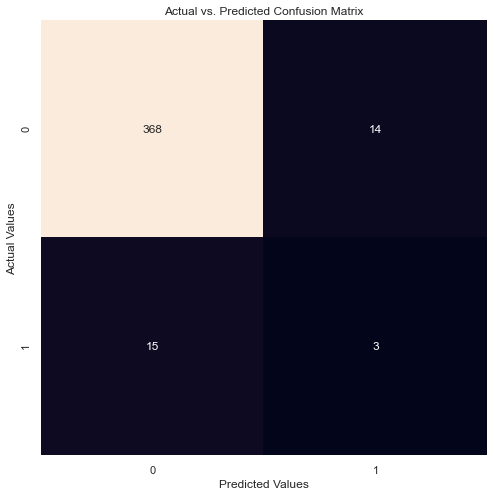

In [60]:
# Plotting Confusion Matrix
conf_mat = create_conf_mat(Y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [61]:
from sklearn.model_selection import cross_val_score
def cvDictGen(functions, scr, X_train=X, y_train=ydf, cv=5, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[cvDict.keys()[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[cvDict.keys()[0]][1]))]
    return cvDictNormalized

In [122]:
cvD = cvDictGen(functions=[RF, logreg, classifier, ADA, GB], scr='roc_auc')
cvD

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s finished


{'RandomForestClassifier': [0.8367431668780994, 0.04012979233275734],
 'LogisticRegression': [0.7436973820781917, 0.02401090520964406],
 'KNeighborsClassifier': [0.5238611463499019, 0.02961027968514271],
 'AdaBoostClassifier': [0.8427978318533043, 0.04920074578274282],
 'GradientBoostingClassifier': [0.8297082228116711, 0.04414992880676105]}

# Hyper parameter optimization using Randomized search

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# AdaBoost

adaHyperParams = {'n_estimators': [10,50,100,200,420]}
gridSearchAda = RandomizedSearchCV(estimator=ADA, param_distributions=adaHyperParams, n_iter=5,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, Y_train)
gridSearchAda.best_params_, gridSearchAda.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   0.1s
[CV] END ....................................n_estimators=50; total time=   0.1s
[CV] END ....................................n_estimators=50; total time=   0.1s
[CV] END ....................................n_estimators=50; total time=   0.1s
[CV] END ....................................n_estimators=50; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   0.2s
[CV] END ...................................n_est

({'n_estimators': 50}, 0.8342363466806552)

In [63]:
# GradientBoost

gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}
gridSearchGB = RandomizedSearchCV(estimator=GB, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, Y_train)
gridSearchGB.best_params_, gridSearchGB.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .......loss=deviance, max_depth=9, n_estimators=258; total time=   2.3s
[CV] END .......loss=deviance, max_depth=9, n_estimators=258; total time=   2.0s
[CV] END .......loss=deviance, max_depth=9, n_estimators=258; total time=   1.8s
[CV] END .......loss=deviance, max_depth=9, n_estimators=258; total time=   1.8s
[CV] END .......loss=deviance, max_depth=9, n_estimators=258; total time=   1.8s
[CV] END .......loss=deviance, max_depth=6, n_estimators=192; total time=   0.7s
[CV] END .......loss=deviance, max_depth=6, n_estimators=192; total time=   0.7s
[CV] END .......loss=deviance, max_depth=6, n_estimators=192; total time=   0.7s
[CV] END .......loss=deviance, max_depth=6, n_estimators=192; total time=   0.7s
[CV] END .......loss=deviance, max_depth=6, n_estimators=192; total time=   0.7s
[CV] END .....loss=exponential, max_depth=8, n_estimators=11; total time=   0.0s
[CV] END .....loss=exponential, max_depth=8, n_e

({'loss': 'deviance', 'max_depth': 1, 'n_estimators': 292}, 0.8541420498921724)

# Train models with help of new hyper parameter

In [64]:
#Fitting both ADA and Gradient

bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, Y_train)
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, Y_train)

In [128]:
cvDictbestpara = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc')
cvDictbestpara

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


{'GradientBoostingClassifier': [0.8508707184869104, 0.03931389731642522],
 'AdaBoostClassifier': [0.8427978318533043, 0.04920074578274282]}

In [65]:
GB_labels=bestGbModFitted.predict_proba(X_test)[:,1]
roc_auc_score(Y_test,GB_labels , average='macro', sample_weight=None)

0.8089005235602095

In [66]:
Ada_labels=bestAdaModFitted.predict_proba(X_test)[:,1]
roc_auc_score(Y_test,Ada_labels , average='macro', sample_weight=None)

0.793848167539267

# Voting based ensamble model

In [69]:
# Soft Voting

from sklearn.ensemble import VotingClassifier
votingMod_soft = VotingClassifier(estimators=[('gb', bestGbModFitted), 
                                         ('ada', bestAdaModFitted)], voting='soft',weights=[2,1])
votingMod_soft = votingMod_soft.fit(X_train, Y_train)

In [70]:
# Hard Voting

from sklearn.ensemble import VotingClassifier
votingMod_hard = VotingClassifier(estimators=[('gb', bestGbModFitted), 
                                         ('ada', bestAdaModFitted)], voting='hard',weights=[2,1])
votingMod_hard = votingMod_hard.fit(X_train, Y_train)

In [74]:
# make predictions with the hard voting model
y_pred_vch = votingMod_hard.predict(X_test)

# make predictions with the soft voting model
y_pred_vcs = votingMod_soft.predict(X_test)

In [75]:
# evaluate both models with the f-1 score
f1_vch = f1_score(Y_test, y_pred_vch)
f1_vcs = f1_score(Y_test, y_pred_vcs)

# print the f-1 scores
print('F1-score of the hard voting classifier: {}'.format(np.round(f1_vch,4)))
print('F1-score of the soft voting classifier: {}'.format(np.round(f1_vcs,4)))

F1-score of the hard voting classifier: 0.1379
F1-score of the soft voting classifier: 0.1379


In [77]:
roc_auc_score(Y_test,y_pred_vcs, average='macro', sample_weight=None)

0.5437754508435138

In [78]:
roc_auc_score(Y_test,y_pred_vch, average='macro', sample_weight=None)

0.5437754508435138

# Testing on Real Test Dataset

In [80]:
# Read Training dataset as well as drop the index column
dst=pd.read_excel(r"C:\Users\hp\LearnBayAIML\PythonCodes\Projects\Credit_Risk\test.xlsx")

# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(dst.columns)):
    cleancolumn.append(dst.columns[i].replace('-', '').lower())
dst.columns = cleancolumn

In [81]:
dst.drop(['column1'],axis=1,inplace=True)
dst.head(10)

seriousdlqin2yrs  revolvingutilizationofunsecuredlines  age  \
0               NaN                              0.885519   43   
1               NaN                              0.463295   57   
2               NaN                              0.043275   59   
3               NaN                              0.280308   38   
4               NaN                              1.000000   27   
5               NaN                              0.509791   63   
6               NaN                              0.587778   50   
7               NaN                              0.046149   79   
8               NaN                              0.013527   68   
9               NaN                              1.000000   23   

   numberoftime3059dayspastduenotworse    debtratio  monthlyincome  \
0                                    0     0.177513         5700.0   
1                                    0     0.527237         9141.0   
2                                    0     0.687648         5083.0   
3                                    1     0.925961         3200.0   
4                                    0     0.019917         3865.0   
5                                    0     0.342429         4140.0   
6                                    0  1048.000000            0.0   
7                                    1     0.369170         3301.0   
8                                    0  2024.000000            NaN   
9                                   98     0.000000            0.0   

   numberofopencreditlinesandloans  numberoftimes90dayslate  \
0                                4                        0   
1                               15                        0   
2                               12                        0   
3                                7                        0   
4                                4                        0   
5                                4                        0   
6                                5                        0   
7                                8                        0   
8                                4                        0   
9                                0                       98   

   numberrealestateloansorlines  numberoftime6089dayspastduenotworse  \
0                             0                                    0   
1                             4                                    0   
2                             1                                    0   
3                             2                                    0   
4                             0                                    0   
5                             0                                    0   
6                             0                                    0   
7                             1                                    0   
8                             1                                    0   
9                             0                                   98   

   numberofdependents  
0                 0.0  
1                 2.0  
2                 2.0  
3                 0.0  
4                 1.0  
5                 1.0  
6                 3.0  
7                 1.0  
8                 0.0  
9                 0.0

In [82]:
dst.drop(['seriousdlqin2yrs'], axis=1, inplace=True)

In [83]:
tds=dst.copy()

tds['age']

bins = [0, 20, 39, 59,80,120]
labels=['Young','Above 20','Midage','Senior','Very Senior']
tds['age_bucket'] = pd.cut(tds['age'], bins=bins, labels=labels)
tds[['age','age_bucket']]

# Dropping category with age = 0

tds.drop(tds[tds['age'] == 0].index, inplace = True)

In [84]:
med_mi=tds.groupby(['age_bucket']).agg({'monthlyincome':'median'})
med_mi.loc[2,'monthlyincome']
med_mi

monthlyincome
age_bucket                
Young                  NaN
Above 20            4000.0
Midage              6132.0
Senior              5500.0
Very Senior         4083.5

In [85]:
tds.loc[(tds['age_bucket'] == 'Young'), 'monthlyincome']=tds.loc[(tds['age_bucket'] == 'Young'), 'monthlyincome'].fillna(0)
tds.loc[(tds['age_bucket'] == 'Above 20'), 'monthlyincome']=tds.loc[(tds['age_bucket'] == 'Above 20'), 'monthlyincome'].fillna(med_mi.loc[1,'monthlyincome'])
tds.loc[(tds['age_bucket'] == 'Midage'), 'monthlyincome']=tds.loc[(tds['age_bucket'] == 'Midage'), 'monthlyincome'].fillna(med_mi.loc[2,'monthlyincome'])
tds.loc[(tds['age_bucket'] == 'Senior'), 'monthlyincome']=tds.loc[(tds['age_bucket'] == 'Senior'), 'monthlyincome'].fillna(med_mi.loc[3,'monthlyincome'])
tds.loc[(tds['age_bucket'] == 'Very Senior'), 'monthlyincome']=tds.loc[(tds['age_bucket'] == 'Very Senior'), 'monthlyincome'].fillna(med_mi.loc[4,'monthlyincome'])

tds.isna().sum()

revolvingutilizationofunsecuredlines       0
age                                        0
numberoftime3059dayspastduenotworse        0
debtratio                                  0
monthlyincome                              0
numberofopencreditlinesandloans            0
numberoftimes90dayslate                    0
numberrealestateloansorlines               0
numberoftime6089dayspastduenotworse        0
numberofdependents                      2626
age_bucket                                 0
dtype: int64

In [100]:
tds['numberofdependents'].value_counts()

tds['numberofdependents']=tds['numberofdependents'].fillna(0)

tds.isna().sum()

# tds.drop('numberoftimes90dayslate',axis=1,inplace=True)

tds.shape


(101503, 9)

In [101]:
test_pred = votingMod_soft.predict_proba(tds)[:,1]

In [103]:
output = pd.DataFrame({'ID':tds.index, 'probability':test_pred})

In [104]:
output.to_csv("./predictions.csv", index=False)